<a href="https://colab.research.google.com/github/Koush98/Codespaze/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Customer-Segmentation-Analysis**

**Description**: Using clustering algorithms to segment customers based on
their purchasing behaviour. This helps in understanding the different
types of customers and tailoring marketing strategies to meet their
needs.

**o Why:**
Understanding customer segments allows businesses to target

specific groups with personalized marketing, leading to higher
satisfaction and retention.


**o Tasks:**
▪ Preprocessing the customer data.
▪ Applying clustering K-means clustering.
▪ Analysing and interpretation the clusters.
▪ Present findings with visualizations.

In [61]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [62]:
#The data set link uploaded in github repository
url='https://raw.githubusercontent.com/Koush98/Codespaze/main/Customer-Segmentation-Analysis/Mall_Customers%20(1).csv'

In [6]:

# reading the dataset
df=pd.read_csv(url)

In [7]:

#viewing first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:

# The count of rows and columns
df.shape

(200, 5)

In [65]:
# Count of null
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [67]:
# Count of Duplicated values
df.duplicated().sum()

0

In [68]:

# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
# Statistical description of the numerical features
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


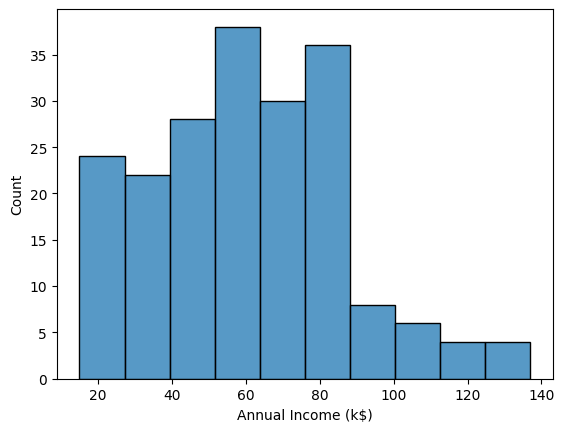

In [78]:
# Histogram of Annual Income
sns.histplot(df["Annual Income (k$)"])
plt.show()

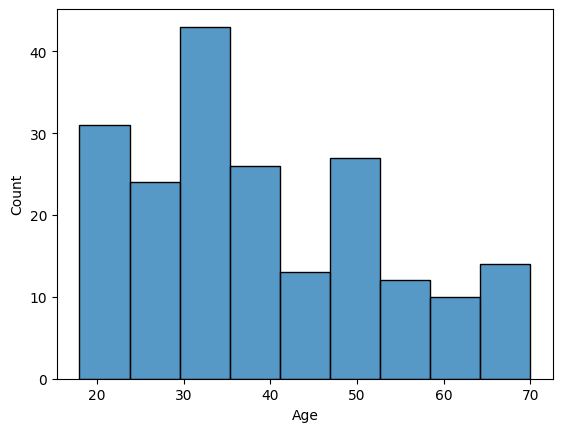

In [77]:

# Histogram of Age
sns.histplot(df["Age"])
plt.show()

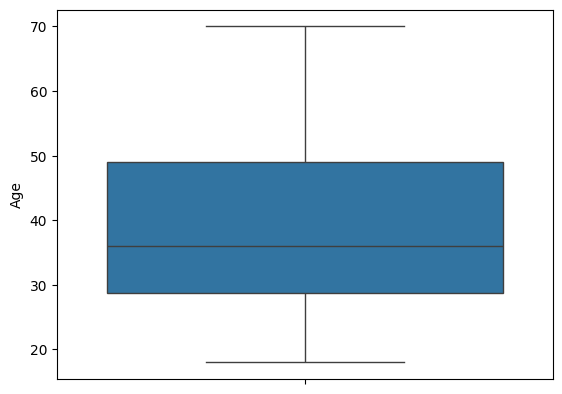

In [76]:

# Box plot of Age
sns.boxplot(df["Age"])
plt.show()

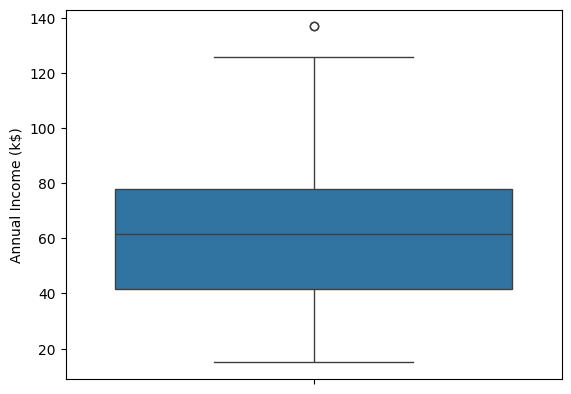

In [75]:
# Box plot of Annual Income
sns.boxplot(df["Annual Income (k$)"])
plt.show()

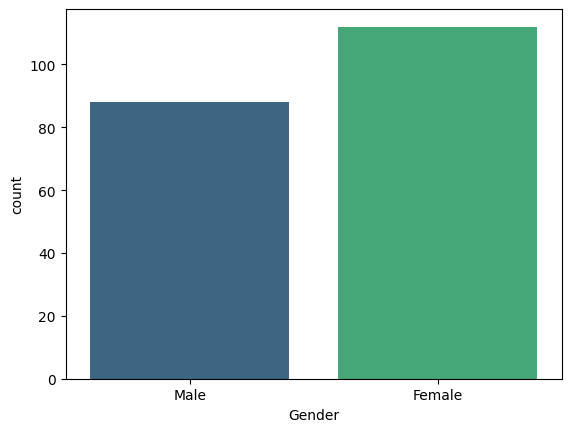

In [30]:
sns.countplot(x='Gender', data=df,hue='Gender', palette='viridis')
plt.show()

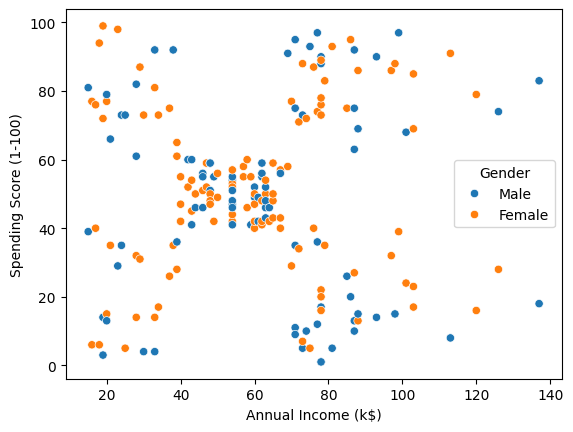

In [31]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue='Gender')
plt.show()

In [34]:
df1=df.drop('Gender', axis=1)

In [37]:
corelation = df1.corr()

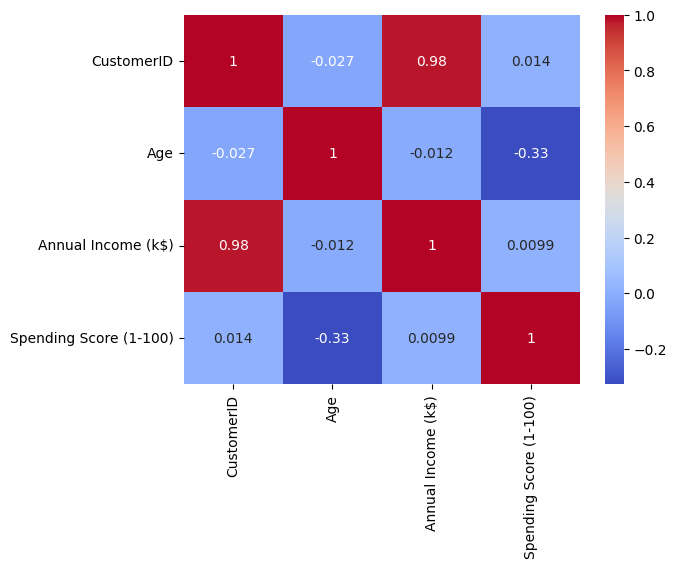

In [79]:
sns.heatmap(corelation, annot=True,cmap='coolwarm')
plt.show()

In [80]:
# Droping unnecessary columns like customerID and Age
x=df1.drop(['CustomerID','Age'], axis=1)

In [42]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [43]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [45]:
# Elbow Method to find optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest cluster center

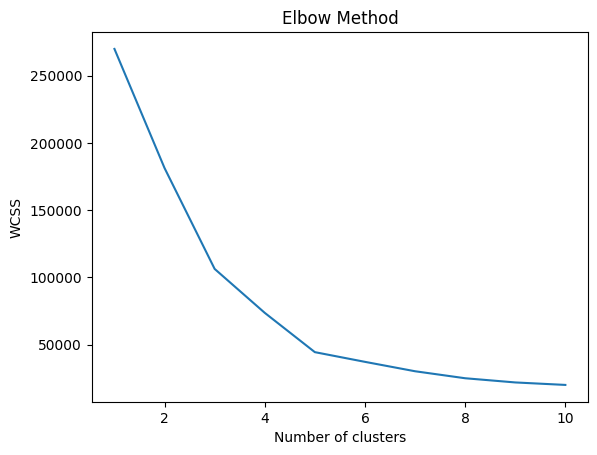

In [46]:
# Plotting the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
# Applying KMeans with the optimal number of clusters (let's say it's 4 based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [86]:
x['Cluster'] = y_kmeans

In [87]:
x.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


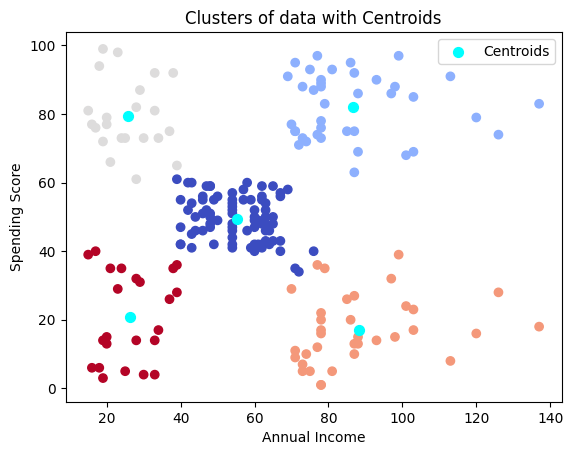

In [99]:
import matplotlib.pyplot as plt

# Visualizing the clusters
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'], c=x['Cluster'], cmap='coolwarm')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='cyan', label='Centroids')
plt.title('Clusters of data with Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()